In [1]:
%pip install --upgrade --quiet  langchain-google-genai pillow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from dotenv import load_dotenv

load_dotenv()

True

In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [5]:
llm = ChatGoogleGenerativeAI(model="gemini-pro")
result = llm.invoke("자연어처리에 대해서 간략히 설명해 줘")
print(result.content) 

자연어처리(NLP)는 컴퓨터가 인간 언어를 이해하고 처리할 수 있도록 만드는 인공지능(AI)의 한 분야입니다.

NLP의 주요 목표는 다음과 같습니다.

* **텍스트 분류:** 텍스트를 특정 카테고리로 분류
* **정서 분석:** 텍스트의 감정적 지향 파악
* **이름 엔티티 인식:** 텍스트에서 사람, 장소, 조직과 같은 이름 엔티티 식별
* **요약:** 긴 텍스트에서 주요 요점 파악
* **기계 번역:** 한 언어에서 다른 언어로 텍스트 변환

NLP는 다음과 같은 다양한 응용 분야에서 사용됩니다.

* 검색 엔진
* 채터봇
* 소셜 미디어 분석
* 의료 진단
* 재무 예측


In [6]:
from langchain_core.messages import HumanMessage, SystemMessage

model = ChatGoogleGenerativeAI(
    model="gemini-pro",  
    convert_system_message_to_human=True,  
)

model.invoke(
    [
        SystemMessage(content="Answer only yes or no."),
        HumanMessage(content="Is apple a fruit?"),
    ]
)


c:\Users\ryeon\AppData\Local\Programs\Python\Python310\lib\site-packages\langchain_google_genai\chat_models.py:352: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


AIMessage(content='Yes', response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-61f332bd-8dd9-4c4f-ab6e-23c511373cce-0', usage_metadata={'input_tokens': 12, 'output_tokens': 1, 'total_tokens': 13})

In [7]:
for chunk in llm.stream("Google 의 기업 역사에 대해서 markdown 형식으로 작성해 줘"):
    print(chunk.content, end="", flush=True) 

**구글의 기업 역사**

**초창기 (1996-2004)**

* 1996년: 스탠포드 대학 박사 과정생인 래리 페이지와 세르게이 브린이 구글(Google)을 설립.
* 1998년: Google 검색 엔진 공개.
* 2000년: Google AdWords 광고 플랫폼 출시.
* 2004년: Google 최초 공개 매도 (IPO).

**확장기 (2005-2015)**

* 2005년: Google 지도, Google 지메일, Google 어스 등 여러 제품 출시.
* 2006년: YouTube 인수.
* 2008년: Google 크롬 브라우저 출시.
* 2010년: Google 안드로이드 운영체제 출시.
* 2011년: 모토로라 모빌리티 인수.

**다각화기 (2016-현재)**

* 2015년: 알파벳(Alphabet)이 모회사로 설립됨.
* 2016년: Waymo 자율주행 자동차 회사 설립.
* 2017년: Google 렌즈 출시.
* 2019년: Stadia 클라우드 게임 플랫폼 출시.
* 2020년: COVID-19 팬데믹 동안 원격 근무 및 디지털화 가속화.
* 현재: 인공지능, 클라우드 컴퓨팅, 헬스케어 분야 지속적인 투자 및 확장.

**주요 인수 및 파트너십**

* YouTube (2006)
* 모토로라 모빌리티 (2011)
* Nest Labs (2014)
* Fitbit (2021)
* 파트너십: IBM, 페이스북, 타타 컨설턴시 서비스

**재정 성과**

* 2023년 현재 시가 총액 약 1조 1천억 달러.
* 2022년 매출 약 2830억 달러.
* 주요 수익원: 디지털 광고, 클라우드 서비스, 하드웨어 판매.

**문화와 영향**

* "10% 시간" 정책을 통해 직원이 자신의 관심사를 추구할 수 있도록 함.
* 혁신과 기술 발전의 선구자로 인정됨.
* 사회적 책임과 환경 보호에 대한 약속.
* "구글하세요"는 동사의 강력한 브랜드와 검색 엔진의 널리 된 사용으로 인해 일상적인 용어가 됨.

In [8]:
from langchain_google_genai import (
    ChatGoogleGenerativeAI,
    HarmBlockThreshold,
    HarmCategory,
)

llm = ChatGoogleGenerativeAI(
    model="gemini-pro",
    safety_settings={
        HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
    },
)


In [9]:
from langchain_google_genai import (
    ChatGoogleGenerativeAI,
    HarmBlockThreshold,
    HarmCategory,
)

llm = ChatGoogleGenerativeAI(
    model="gemini-pro",
    safety_settings={
        HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
    },
)

results = llm.batch(
    [
        "2+2 의 계산 결과는?", 
        "3+5 의 계산 결과는?",
    ]
)

for res in results:
    print(res.content) 


4
8


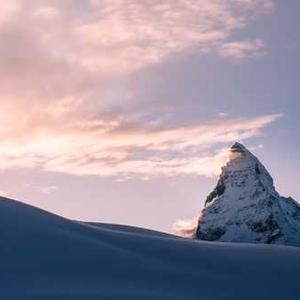

In [10]:
import requests
from IPython.display import Image

image_url = "https://picsum.photos/seed/picsum/300/300"  
content = requests.get(image_url).content  
Image(content)  


In [ ]:
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    PIL 이미지를 Base64로 인코딩된 문자열로 변환합니다.

    :param pil_image: PIL 이미지
    :return: 크기 조정된 Base64 문자열
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG") 
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Base64로 인코딩된 문자열을 이미지로 표시합니다.

    :param img_base64:  Base64 문자열
    """
  
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
   
    display(HTML(image_html))


file_path = "./images/jeju-beach.jpg"
pil_image = Image.open(file_path)

image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)


In [ ]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
message = HumanMessage(  
    content=[
        {
            "type": "text", 
            "text": "What's in this image?",  
        },  
        {"type": "image_url", "image_url": f"data:image/jpeg;base64,{image_b64}"},
    ]
)
llm.invoke([message])  